<a href="https://colab.research.google.com/github/GiordanDelaCruz/Neural_Network_MNIST_Digits/blob/master/YT_DeepLearning%26CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Importing TensorFlow
import tensorflow as tf

# Version of TensorFlow
tf.__version__

In [0]:
# Importing a data set if 28x28 images of hand-written digits 
# Note: This data set is from mnist (Modified National Institute of Standards and Technology)
mnist = tf.keras.datasets.mnist

# Unpacking the dataset into variables
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
# Displaying one of the training data set as a tensor
print("We will now be printing out some of the training data images from our data set. Keep in mind that these training data images are all really mulitdimensional tensors.")
print("This means that the data will be composed of a bunch of values\n")
print("Observe that the 0th training data image is:\n")
print(x_train[0], "\n")

In [0]:
# Importing matplotlib (This is a Python 2D plotting library)
import matplotlib.pyplot as plt

# Plotting a few of the training data images from the dataset in color and in greyscale
# Note: The "cm" stands for Color Map
print("Plotting the 0th training data image:")
plt.imshow(x_train[0])
plt.show()

print("\nYou can also make the plot of the numbers in grayscale if you want!!")

print("\nPlotting the 0th training data image in greyscale:")
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show() 

print("\nPlotting the 13th training data image in greyscale:")
plt.imshow(x_train[13], cmap = plt.cm.binary)
plt.show()

In [0]:
# Normalizing the our training datasets
x_train_norm = tf.keras.utils.normalize(x_train, axis = 1)
x_test_norm = tf.keras.utils.normalize(x_test, axis = 1)


print("\nPlotting the 0th training data image in grayscale after normalization:")
plt.imshow(x_train_norm[0], cmap = plt.cm.binary)
plt.show()

In [0]:
# Displaying the normalized training data set as a tensor
print("Observe that our previous tensor printed above has its values changed!!") 
print("We normalize our data to make it easier for our network to learn!!\n")
print(x_train_norm[0])

In [0]:
# Building the model 
model = tf.keras.models.Sequential()

# Adding the first layer of the network, Flatten() will reshape the layer
model.add(tf.keras.layers.Flatten())

# Adding a dense layers to the network
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))

# Adding the output layer
# Note: The output layer should always have the number of case classifications 
#       In our case, it is 10 as the range of digits are from 0-9
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))


# Defining parameters to train the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model
print("Now that our deep neural network is built, let's train it!\n")
model.fit(x_train_norm, y_train, epochs=3)


Now that our deep neural network is built, let's train it!

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2632 - acc: 0.9215
Epoch 2/3
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1057 - acc: 0.9671
Epoch 3/3
60000/60000 [==============================] - 6s 104us/sample - loss: 0.0713 - acc: 0.9769


In [0]:
# Calculating the validation loss and validation accuracy
print("Calculating the validation loss and validation accuracy.")  
print("Note: keep in mind that if your val_loss and val_acc differ by a huge value,\n      there is a good chance your model has overfitted!!\n")
val_loss, val_acc = model.evaluate(x_test_norm, y_test)
print(val_loss, val_acc)

In [0]:
# Saving a model
model.save('giorn_num_reader.model')

# Loading a model
new_model = tf.keras.models.load_model('giorn_num_reader.model')

In [0]:
# Making a prediction
predictions = new_model.predict(x_test_norm)

print("Here is our predictions! Keep in mind that predictions are all one hot arrays ", end = "")
print("which reperesent our probability distribution.\n\n", predictions)

print("\nObserve that the length of out predictions array is", len(predictions))

Let's view the predictions in out predictions array!!

predictions[0] = 7
predictions[5] = 1
predictions[9999] = 6

From our normalized training data set, our actual data at each particular and arbitrary index was:

x_test_norm[0] =


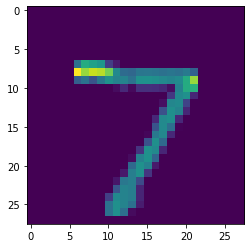


x_test_norm[5] =


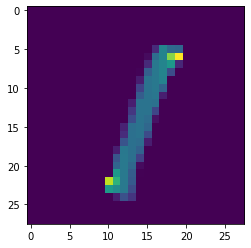


x_test_norm[9999] =


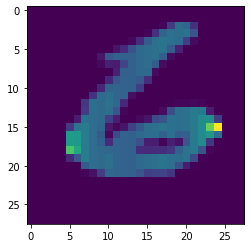

In [0]:
# Importing numPy library
import numpy as np

# Displaying predictions
# Note: Since the prediction is a list of all one hot arrays, argmax takes the highest index value and that represents our prediction!!
#       Recall that the activation function will assign a probability value to each output neuron, and our argmax function will take the
#       index with the highest value in each one hot encoded array
print("Let's view the predictions in out predictions array!!\n")

print("predictions[0] =", np.argmax(predictions[0]))
print("predictions[5] =", np.argmax(predictions[5]))
print("predictions[9999] =", np.argmax(predictions[9999]))


# Plotting the answers on a graph
print("\nFrom our normalized training data set, our actual data at each particular and arbitrary index was:")

print("\nx_test_norm[0] =")
plt.imshow(x_test_norm[0])
plt.show()

print("\nx_test_norm[5] =")
plt.imshow(x_test_norm[5])
plt.show()

print("\nx_test_norm[9999] =")
plt.imshow(x_test_norm[9999])
plt.show()